**2.(a) Visualization, preprocessing and transformation**

In [13]:
#importing required libraries 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
#reading Clustering data from given link
c_data= pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv')
c_data.head()
coln_names = ['x1','x2','x3','x4']
c_data_scaled = c_data.copy()
variables= c_data_scaled[coln_names]
variables


,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


In [15]:
#checking data types
print(c_data.dtypes)

x1    float64
x2    float64
x3    float64
x4    float64
dtype: object


**Observation:**
All data are float type.

In [16]:
#checking whether there are null entries or not
for col in c_data.columns.values:
   vals = pd.unique(c_data[col])
   print(col + ' has ' + str(len(vals)) + ' unique values and '+ str(c_data[col].isnull().sum()) + ' null entries')
   if len(vals) < 20:
     lst_str=''
     for n in range(0, len(vals)):
       lst_str= lst_str + str(vals[n]) + ','

x1 has 351 unique values and 0 null entries
x2 has 351 unique values and 0 null entries
x3 has 351 unique values and 0 null entries
x4 has 351 unique values and 0 null entries


**Observation:**
There are no null entries.

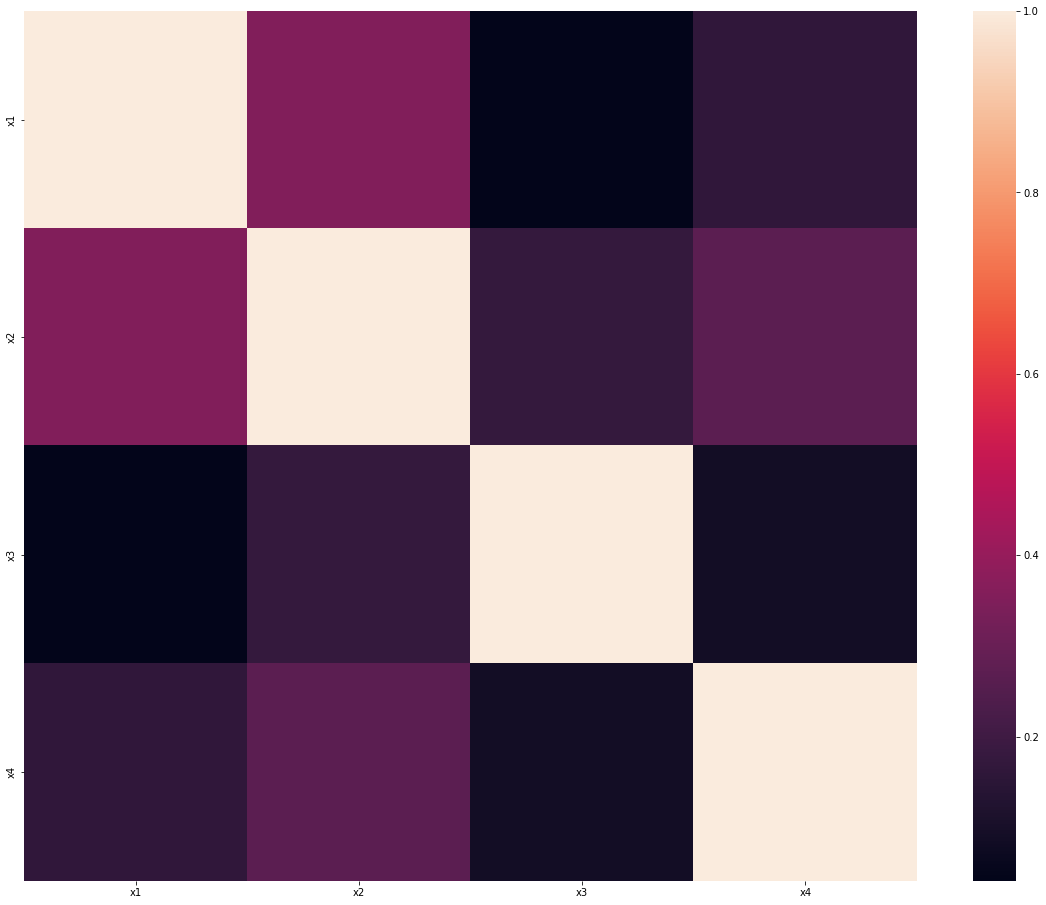

In [17]:
#plotting heatmap for correlation matrix
corrMatrix = c_data.corr(method='spearman')
fig, ax= plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

**Observation:**
There is no significant co-relation between features.

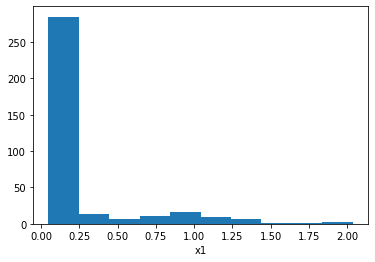

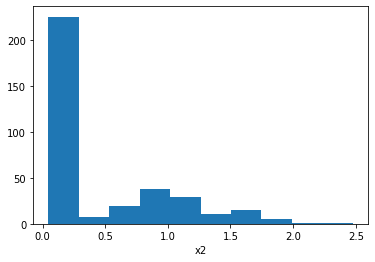

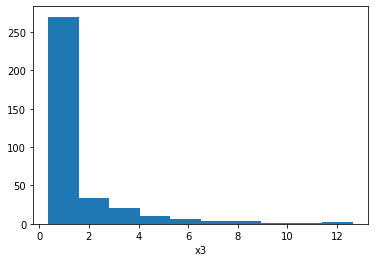

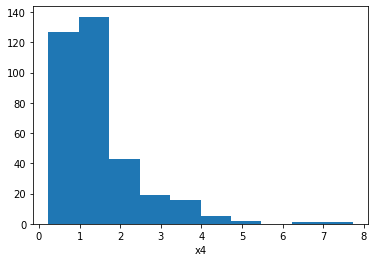

In [18]:
#plotting histogram to check distribution of data
for col in c_data.columns.values:
  if (c_data[col].dtypes == 'float64')| (c_data[col].dtypes == 'object'):
    plt.hist(c_data[col])
    plt.xlabel(col)
    plt.show()

**Observation:**
All features are positively skewed. So, we can't use standard scalar. We are going to use MinMaxScalar.

In [19]:
#data is scaled by using MinMaxScalar
scaler = MinMaxScaler()
c_data_scaled[coln_names] = scaler.fit_transform(variables.values)
c_data_scaled

,x1,x2,x3,x4
0,0.394137,0.552636,0.048461,0.101559
1,0.607227,0.598356,0.043724,0.067448
2,0.466854,0.416411,0.069271,0.150071
3,0.485668,0.442824,0.067504,0.100287
4,0.499257,0.482481,0.040521,0.198586
...,...,...,...,...
346,0.078085,0.061217,0.195574,0.212692
347,0.090910,0.034783,0.027432,0.337638
348,0.023773,0.024867,0.047202,0.427267
349,0.031725,0.034559,0.059603,0.275295


In [20]:
#data is scalaed in range of 1 to 10
scaler = MinMaxScaler(feature_range=(1,10))
c_data_scaled[coln_names] = scaler.fit_transform(variables.values)
c_data_scaled.describe()


,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,2.041951,2.577311,1.936207,2.501573
std,1.545378,1.893382,1.223723,1.157702
min,1.000000,1.000000,1.000000,1.000000
25%,1.283947,1.252815,1.328269,1.751037
50%,1.474226,1.439654,1.525136,2.150999
75%,1.742079,3.992605,1.872924,2.791646
max,10.000000,10.000000,10.000000,10.000000


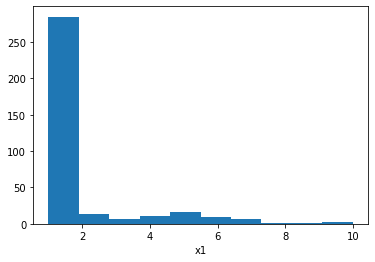

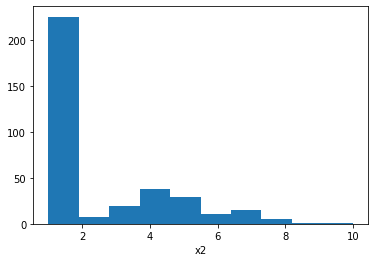

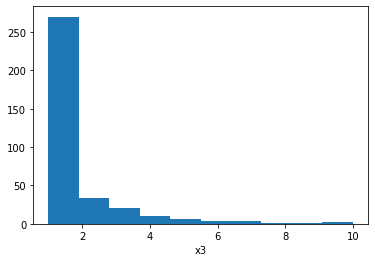

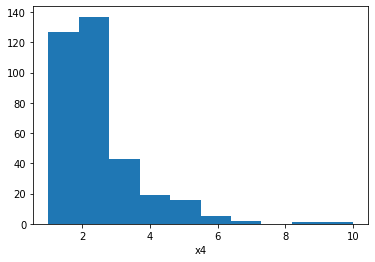

In [21]:
#plotting histograms for scaled data 
for col in c_data_scaled.columns.values:
  if (c_data_scaled[col].dtypes == 'float64')| (c_data_scaled[col].dtypes == 'object'):
    plt.hist(c_data_scaled[col])
    plt.xlabel(col)
    plt.show()

**Observation:**
After scaling data by using MinMaxScalar, there is no change in distribution.

In [22]:
#log transformation of given data
import numpy as np
c_data_log = pd.DataFrame(columns=['log(x1)', 'log(x2)', 'log(x3)','log(x4)'])
c_data_log['log(x1)']=np.log(c_data['x1'])
c_data_log['log(x2)']=np.log(c_data['x2'])
c_data_log['log(x3)']=np.log(c_data['x3'])
c_data_log['log(x4)']=np.log(c_data['x4'])
c_data_log


,log(x1),log(x2),log(x3),log(x4)
0,-0.183497,0.328892,-0.038506,-0.006349
1,0.228002,0.405790,-0.100796,-0.303764
2,-0.023316,0.056876,0.196825,0.305452
3,0.014262,0.115722,0.178854,-0.015983
4,0.040552,0.198042,-0.145235,0.542804
...,...,...,...,...
346,-1.590240,-1.631050,1.017763,0.602419
347,-1.472374,-2.028641,-0.350615,1.016288
348,-2.344683,-2.230949,-0.054679,1.233906
349,-2.192030,-2.032790,0.094329,0.831038


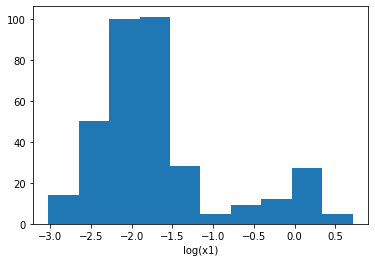

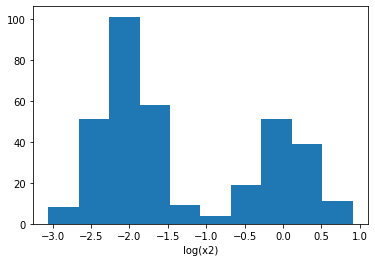

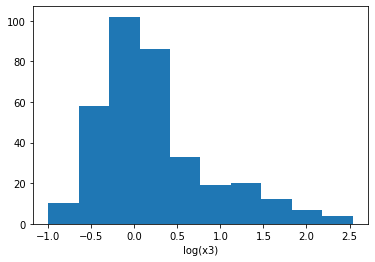

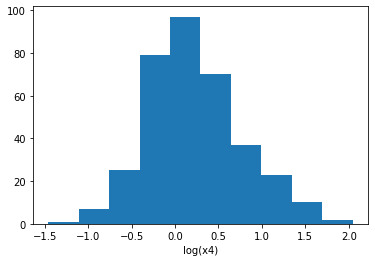

In [24]:
#plotting histograms for log transformed data
for col in c_data_log.columns.values:
  if (c_data_log[col].dtypes == 'float64')| (c_data_log[col].dtypes == 'object'):
    plt.hist(c_data_log[col])
    plt.xlabel(col)
    plt.show()

**Observation:**
After using log transform, distribution of data can be found nearly normal distribution.

**2.(b) Training k-means, and finding the appropriate number of k**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rate of change of k-Means versus number of clusters')

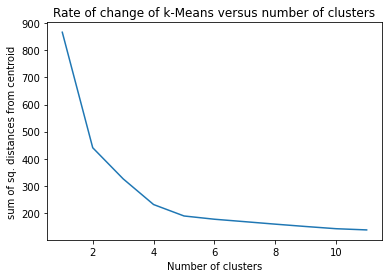

In [25]:
#training k-mean algorithm 
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,12):
  Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  Kmeans.fit(c_data_log)
  wcss.append(Kmeans.inertia_)
  
sns.lineplot(np.arange(1, 12), wcss)
plt.xlabel('Number of clusters')
plt.ylabel("sum of sq. distances from centroid")
plt.title("Rate of change of k-Means versus number of clusters")

In [26]:
#calculating silhouette score
from sklearn.metrics import silhouette_score
# Prepare models
kmean_clstrd = KMeans(n_clusters=5).fit(c_data_log)
score= silhouette_score(c_data_log, kmean_clstrd.labels_, metric='euclidean')
print('kmeans silhouette_score:', score )

kmeans silhouette_score: 0.37562625904859126


**Findings:**
According to the silhouette score and elbow method that we have used above, we found appropriate number of 'k' is 5.

**2.(c)** Visualization of the t-sne embedding

In [27]:
kmean_clstrd.labels_
kmean_clstrd.labels_.shape
c_data_log['Kmean']= kmean_clstrd.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


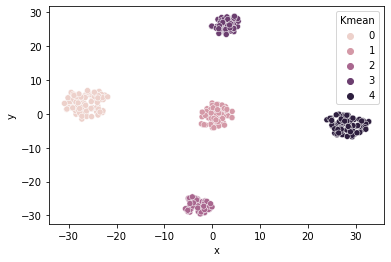

In [28]:
#using t-sne embedding plotting the data as optimum number of clusters
from sklearn.manifold import TSNE
tsne_rate= TSNE(learning_rate=20)
tsne_features= tsne_rate.fit_transform(c_data_log)
c_data_log['x']= tsne_features[:,0]
c_data_log['y']= tsne_features[:,1]
sns.scatterplot(x='x',y='y',hue='Kmean', data=c_data_log)
plt.show()


**References:**

1.https://www.youtube.com/watch?v=Ato-hcv0NK0&list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6&index=3

2.https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

3.https://scikit-learn.org/stable/modules/preprocessing.html

4.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

5.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

6.https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html